In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

In [ ]:

fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")


fake_df["label"] = 0  
true_df["label"] = 1  


data = pd.concat([fake_df, true_df], ignore_index=True)


data = data.sample(frac=1, random_state=42).reset_index(drop=True)


data = data[["title", "text", "label"]]


In [ ]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\[.*?\]', '', text)  
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'<.*?>+', '', text)  
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\n', '', text)  
    text = re.sub(r'\w*\d\w*', '', text) 
    return text


data["text"] = data["text"].apply(clean_text)


In [4]:
X = data["text"]
y = data["label"]

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = vectorizer.fit_transform(X)


In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


log_model = LogisticRegression()
log_model.fit(X_train, y_train)


y_pred_log = log_model.predict(X_test)


print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Results:
Accuracy: 0.9806236080178173

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4710
           1       0.98      0.98      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980


Confusion Matrix:
 [[4617   93]
 [  81 4189]]


In [7]:
from sklearn.naive_bayes import MultinomialNB


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


y_pred_nb = nb_model.predict(X_test)


print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Results:
Accuracy: 0.932293986636971

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4710
           1       0.92      0.93      0.93      4270

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


Confusion Matrix:
 [[4381  329]
 [ 279 3991]]


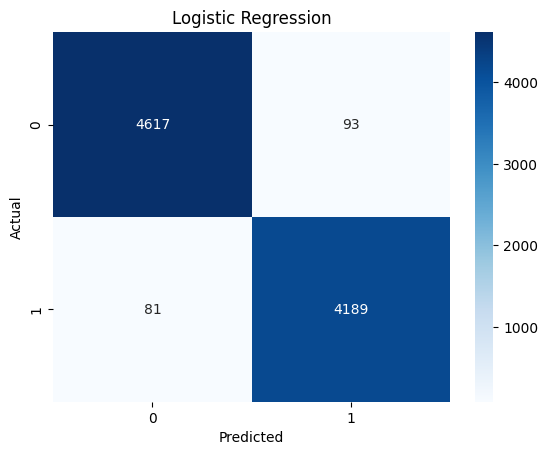

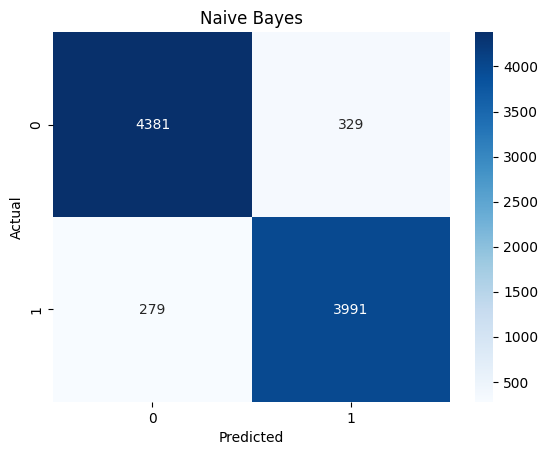

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion(confusion_matrix(y_test, y_pred_log), "Logistic Regression")
plot_confusion(confusion_matrix(y_test, y_pred_nb), "Naive Bayes")
